Check 

1. Current as a function of coupling strength.

2. The current decomposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/post_analysis/analysis_classes")
try:
    from dynamics_analysis import nonequilibrium_analysis
except ImportError as e:
    print(f"ImportError: {e}")

In [2]:
#PATH="/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/final_check/AB_test/false_A_false_B"
# directory of the note book
import os
PATH = "/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/final_check/AB_test/true_A1_true_B"
noneq = nonequilibrium_analysis()

In [3]:
#strengths = ["0","0.001","0.01","0.1","1","10"]
strengths = ['0', '0.001', '0.0018', '0.0032', '0.0056', '0.01', '0.018', '0.032', '0.056', '0.1', '0.18', '0.32', '0.56', '1']
k_attach_right_FTCs = ["0.00002","0.0002","0.002","0.02"]
current_array = np.zeros((len(k_attach_right_FTCs),len(strengths),2))
for i, k_f in enumerate(k_attach_right_FTCs):
    #print("...k_f = "+str(k_f))
    for j,strength in enumerate(strengths):
        #print("strength = "+str(strength))
        sub_path = PATH +"/k_attach_far_" +str(k_f)+"/coupling_strength_"+strength
        current_array[i,j,0],current_array[i,j,1] = noneq.calculate_current(sub_path)

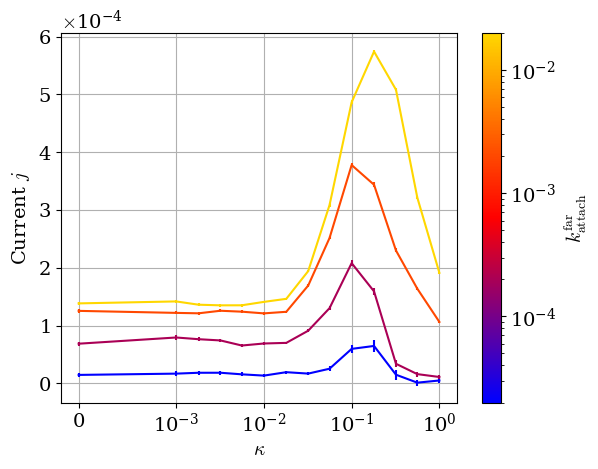

In [4]:
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size':14})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']  # Or another serif font available
plt.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
log_norm = mcolors.LogNorm(vmin=min(np.float64(k_attach_right_FTCs)), vmax=max(np.float64(k_attach_right_FTCs)))
#cmap = plt.get_cmap('brg')
colors = ['blue','red','gold']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
for i, k_attach_right_FTC in enumerate(k_attach_right_FTCs):
    color = cmap(log_norm(float(k_attach_right_FTC)))
    plt.errorbar(np.float64(strengths),current_array[i,:,0],yerr = current_array[i,:,1],color = color)

ax.set_xscale('symlog', linthresh=np.float64(strengths)[1])
ax.set_xlabel(r"$\kappa$")
ax.set_ylabel(r'Current $j$')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=log_norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$\\mathit{k}_\\mathrm{attach}^\\mathrm{far}$")
#cbar.set_ticks(np.float64(k_attach_right_FTCs))  # Optional: Adjust colorbar ticks to match labels
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, -4))  # Controls when to use scientific notation
ax.yaxis.set_major_formatter(formatter)
plt.grid(True)

In [5]:
# current decomposition

In [6]:
noneq = nonequilibrium_analysis()
strengths = ['0', '0.001', '0.0018', '0.0032', '0.0056', '0.01', '0.018', '0.032', '0.056', '0.1', '0.18', '0.32', '0.56', '1', '1.8', '3.2', '5.6', '10']
intermediate_couplings = ['0', '0.1']
r_r_bead = np.zeros((len(k_attach_right_FTCs),len(intermediate_couplings),2))
r_l_bead = np.zeros((len(k_attach_right_FTCs),len(intermediate_couplings),2))
for j, k_f in enumerate(k_attach_right_FTCs):
    for k, strength in enumerate(intermediate_couplings):
        #print("strength = "+str(strength))
        sub_path = PATH +"/k_attach_far_" +str(k_f)+"/coupling_strength_"+strength
        r_r_bead[j,k,0],r_r_bead[j,k,1],r_l_bead[j,k,0],r_l_bead[j,k,1] = noneq.hopping_rates(sub_path)

In [7]:
def current_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    return (r_r_mean-r_l_mean),(r_r_err+r_l_err)
def activity_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    return (r_r_mean+r_l_mean),(r_r_err+r_l_err)
def bias_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    bias = (r_r_mean-r_l_mean)/(r_r_mean+r_l_mean)
    bias_err = np.abs(bias)*np.sqrt((r_r_err/r_r_mean)**2+(r_l_err/r_l_mean)**2)
    return bias, bias_err

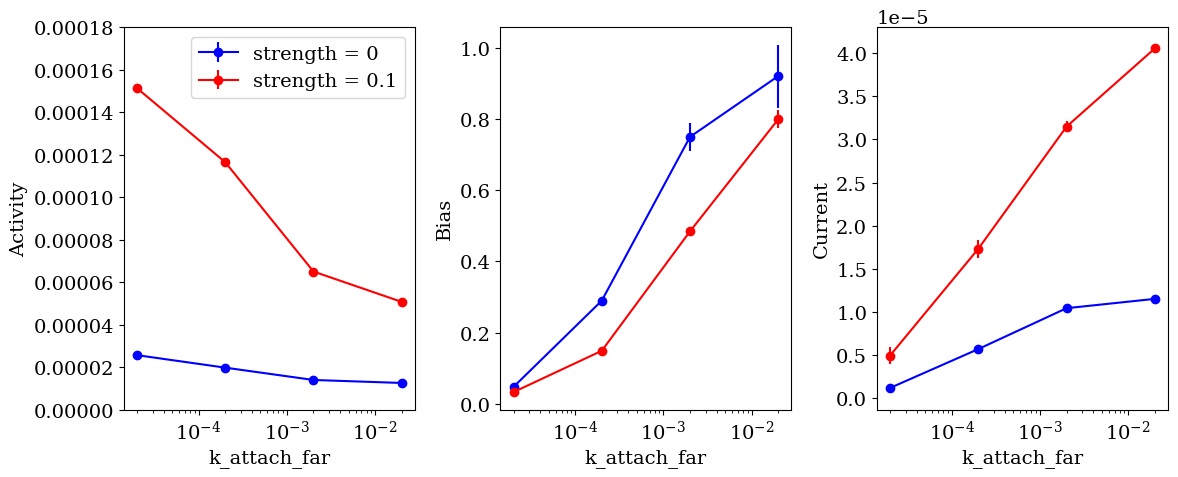

In [ ]:
activity, activity_err = activity_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
bias, bias_err = bias_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
current, current_err = current_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])

fig, ax = plt.subplots(1,3,figsize=(12,5))
ax[0].errorbar(np.float64(k_attach_right_FTCs),activity[:,0],yerr=activity_err[:,0],fmt='o-',label="strength = 0",color='blue')
ax[0].errorbar(np.float64(k_attach_right_FTCs),activity[:,1],yerr=activity_err[:,1],fmt='o-',label="strength = 0.1",color='red')
ax[1].errorbar(np.float64(k_attach_right_FTCs),bias[:,0],yerr=bias_err[:,0],fmt='o-',label="strength = 0",color='blue')
ax[1].errorbar(np.float64(k_attach_right_FTCs),bias[:,1],yerr=bias_err[:,1],fmt='o-',label="strength = 0.1",color='red')
ax[2].errorbar(np.float64(k_attach_right_FTCs),current[:,0],yerr=current_err[:,0],fmt='o-',label="strength = 0",color='blue')
ax[2].errorbar(np.float64(k_attach_right_FTCs),current[:,1],yerr=current_err[:,1],fmt='o-',label="strength = 0.1",color='red')
ax[0].set_ylabel("Activity")
ax[1].set_ylabel("Bias")
ax[2].set_ylabel("Current")
ax[0].set_xlabel("k_attach_far")
ax[1].set_xlabel("k_attach_far")
ax[2].set_xlabel("k_attach_far")
ax[0].legend()
ax[0].set_ylim(0,1.8e-4)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
plt.tight_layout()
plt.show()

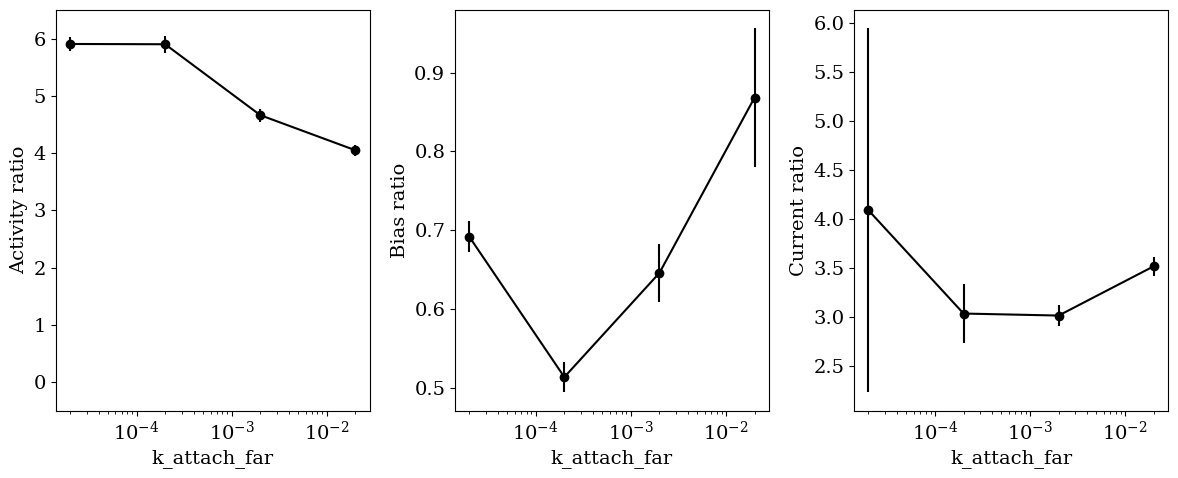

In [11]:
# Ratio of activity and bias, and current
fig, ax = plt.subplots(1,3,figsize=(12,5))
ax[0].errorbar(np.float64(k_attach_right_FTCs),activity[:,1]/activity[:,0],yerr=np.abs(activity[:,1]/activity[:,0])*np.sqrt((activity_err[:,1]/activity[:,1])**2+(activity_err[:,0]/activity[:,0])**2),fmt='o-',color='black')
ax[0].set_ylabel("Activity ratio")
ax[1].errorbar(np.float64(k_attach_right_FTCs),bias[:,1]/bias[:,0],yerr=np.abs(bias[:,1]/bias[:,0])*np.sqrt((bias_err[:,1]/bias[:,1])**2+(bias_err[:,0]/bias[:,0])**2),fmt='o-',color='black')
ax[1].set_ylabel("Bias ratio")
ax[2].errorbar(np.float64(k_attach_right_FTCs),current[:,1]/current[:,0],yerr=np.abs(current[:,1]/current[:,0])*np.sqrt((current_err[:,1]/current[:,1])**2+(current_err[:,0]/current[:,0])**2),fmt='o-',color='black')
ax[2].set_ylabel("Current ratio")
ax[0].set_xlabel("k_attach_far")
ax[1].set_xlabel("k_attach_far")
ax[2].set_xlabel("k_attach_far")
ax[0].set_xscale('log')
ax[0].set_ylim(-0.5,6.5)
ax[1].set_xscale('log')
ax[2].set_xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# plot left and right hopping rate